In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train) , (x_test,y_test) = load_data(path = "mnist.npz")

11493376/11490434 [==============================] - 1s 0us/step


In [2]:
print(x_train.shape, y_train.shape)
print(x_train) # 0 ~ 9
print(x_test.shape, y_test.shape)
print(y_test) # 0 ~ 9

(60000, 28, 28) (60000,)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


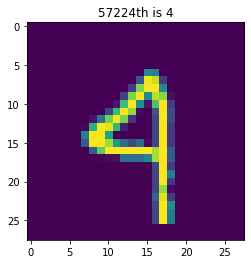

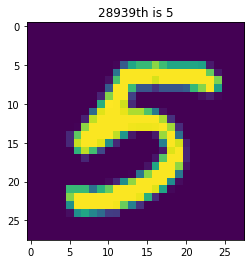

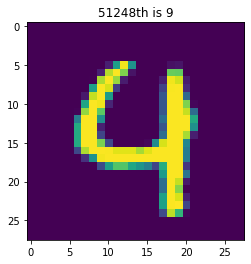

In [3]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3

random_idx = np.random.randint(60000,size=sample_size)

for idx in random_idx :
    img = x_train[idx,:]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title("{idx}th is {label}".format(idx=idx,label=label))

In [4]:
#검증 데이터 만들기
from sklearn.model_selection import train_test_split

x_train , x_val , y_train , y_val = train_test_split(x_train,y_train,test_size=0.3,random_state= 777)
print("학습 데이터 {} 학습 레이블 {}".format(x_train.shape,y_train.shape))
print("검증 데이터 {} 검증 레이블 {}".format(x_val.shape,y_val.shape))

학습 데이터 (42000, 28, 28) 학습 레이블 (42000,)
검증 데이터 (18000, 28, 28) 검증 레이블 (18000,)


In [6]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 전처리 과정
x_train = (x_train.reshape((num_x_train,28*28)))/ 255
x_val = (x_val.reshape((num_x_val,28*28)))/ 255
x_test = (x_test.reshape((num_x_test,28*28)))/ 255

print(x_train.shape)  # -> (42000,784)

(42000, 784)


In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 첫번째 층에 입력데이터 꼭 명시
model.add(Dense(64,activation="relu",input_shape=(784,)))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [10]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["acc"])

In [11]:
history = model.fit(x_train,y_train,
                   epochs=30,
                   batch_size=128,
                   validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 1s 2ms/step - loss: 1.8064 - acc: 0.4265 - val_loss: 1.1968 - val_acc: 0.6182
Epoch 2/30
329/329 [==============================] - 1s 2ms/step - loss: 0.9312 - acc: 0.7040 - val_loss: 0.7634 - val_acc: 0.7614
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.6776 - acc: 0.7878 - val_loss: 0.6146 - val_acc: 0.8056
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.5653 - acc: 0.8237 - val_loss: 0.5258 - val_acc: 0.8388
Epoch 5/30
329/329 [==============================] - 1s 2ms/step - loss: 0.4915 - acc: 0.8510 - val_loss: 0.4656 - val_acc: 0.8600
Epoch 6/30
329/329 [==============================] - 1s 2ms/step - loss: 0.4426 - acc: 0.8674 - val_loss: 0.4270 - val_acc: 0.8757
Epoch 7/30
329/329 [==============================] - 1s 2ms/step - loss: 0.4095 - acc: 0.8775 - val_loss: 0.3986 - val_acc: 0.8845
Epoch 8/30
329/329 [==============================] - 1s 2ms/step - loss: 0.